# Problem Statement
### From the given ‘Iris’ dataset, predict the optimum number of  clusters and represent it visually.

# Importing Libraries

In [ ]:
import numpy as np
from sklearn import datasets
import pandas as pd
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors.nearest_centroid import NearestCentroid
import matplotlib.pyplot as plt
%matplotlib inline

# Reading data

In [ ]:
iris = datasets.load_iris()
Iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [ ]:
Iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# K-Mean Clustering

## -Elbow Method

In [ ]:
x = Iris_df.iloc[:, [0, 1, 2, 3]].values
wcss = []

In [ ]:
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

In [ ]:
wcss

[681.3706,
 152.34795176035792,
 78.85144142614601,
 57.25600931571815,
 46.44618205128205,
 39.03998724608725,
 34.299712121212124,
 30.014398496240602,
 28.036906353450473,
 26.53452922077922]

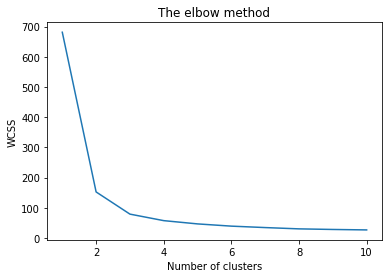

In [ ]:
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

Above graph is called Elbow graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

seeing above graph we choose number of clusters : 3 

In [11]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

In [12]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

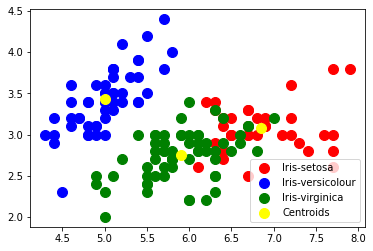

In [13]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')
# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

# Hierarchical Clustering

## Dendograms method

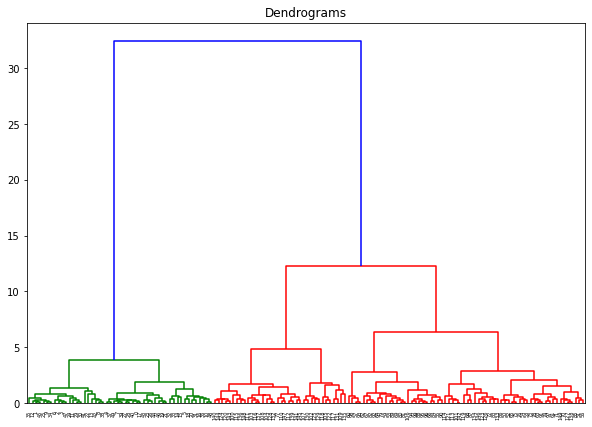

In [14]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(Iris_df, method='ward'))

Above graph is called Dendograms, it helps us decide number of clusters

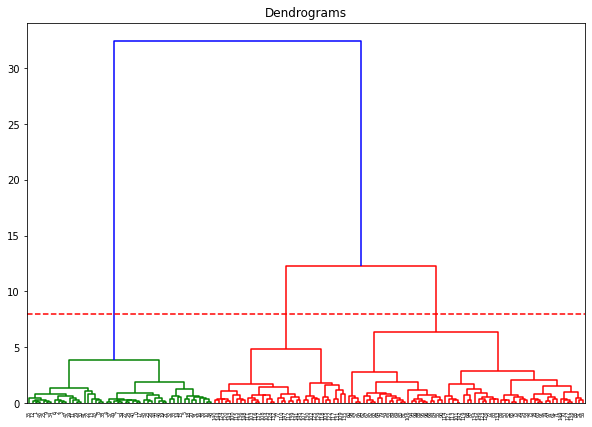

In [15]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(Iris_df, method='ward'))
plt.axhline(y=8, color='r', linestyle='--')

On the dendogram when we draw y=8, it cuts graph at three points So we take number of cluster = 3 then we visualise the result. One can take value of y but the motive is to get some useful pattern.

In [16]:
Cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
y_shc = Cluster.fit_predict(Iris_df)

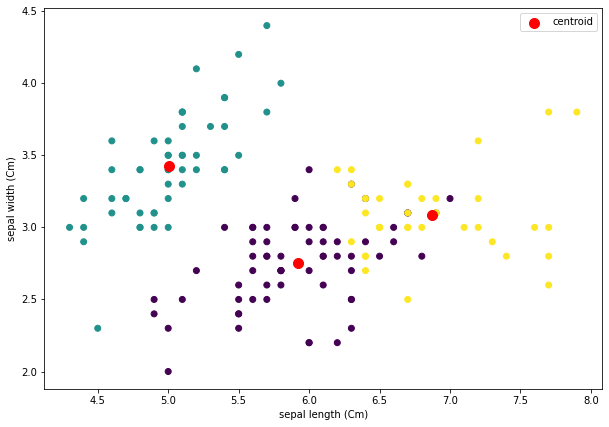

In [17]:
# Plotting the centroids of the clusters
clf = NearestCentroid()
clf.fit(Iris_df, y_shc)
cn = clf.centroids_
# print(cn)

plt.figure(figsize=(10, 7))  
plt.scatter(Iris_df['sepal length (cm)'], Iris_df['sepal width (cm)'],  c=Cluster.labels_) 
plt.scatter(cn[0:3,0], cn[0:3,1], s = 100, c = 'red', label = 'centroid')
plt.xlabel('sepal length (Cm)')
plt.ylabel('sepal width (Cm)')
plt.legend()

From the above graph we get three clusters on the basis of Sepal length and width (same as K-means clusters). Among three clusters two clusters are slightly mixed up.

Although it is correct and useful, lets' go for 2 number of clusters.

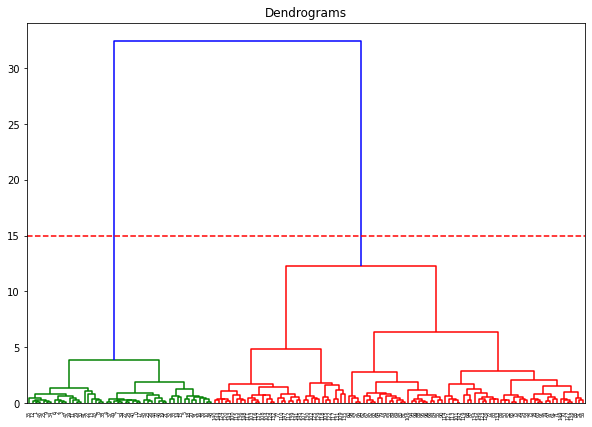

In [18]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(Iris_df, method='ward'))
plt.axhline(y=15, color='r', linestyle='--')

Taking y=15, line cuts dendrograms at two points.

[[6.262 2.872 4.906 1.676]
 [5.006 3.428 1.462 0.246]]


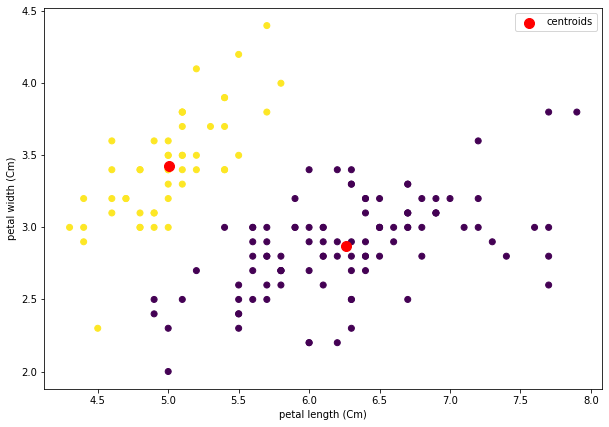

In [20]:
Clluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
y = Clluster.fit_predict(Iris_df)

clf.fit(Iris_df, y)
cent = clf.centroids_
print(cent)

plt.figure(figsize=(10, 7))  
plt.scatter(Iris_df['sepal length (cm)'], Iris_df['sepal width (cm)'],  c=Clluster.labels_) 
plt.scatter(cent[0:2,0], cent[0:2,1], s = 100, c = 'red', label = 'centroids')
plt.xlabel('petal length (Cm)')
plt.ylabel('petal width (Cm)')
plt.legend()

From the above pattern we conclude on the basis of Petal length and Petal width whole dataset can be divided into two distinct clusters.